<a href="https://colab.research.google.com/github/juan0711f/covid19/blob/main/Informe2_ModeladoMatematicoI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h4><b>Modelo Epidémico SI: Análisis Numérico</b></h4></center>
<center><span style='font-size:medium'>Juan José Forero Hernández</span></center>
<center><span style='font-size:medium'>24 de febrero de 2025</span></center>



### **Introducción**

El modelo SI \(Susceptibles\-Infecciosos\) es uno de los modelos más conocidos para estudiar la propagación de enfermedades en una población. Se considera una población con número total de individuos $n$, cerrada consistiendo solamente de susceptibles \($S$\) e infecciosos \($I$\), es decir, $n = S + I$. Una persona susceptible puede llegar a ser infectado por contacto con un infectado, asumiendo también que los infecciosos se mantienen sin posibilidad de recuperación. De ese modo, este modelo podría ser ideal para una enfermedad que no tiene cura o en las etapas iniciales de la expansión de una enfermedad. Este modelo viene esquematizado de la siguiente manera:

$$
\left[\begin{array}{c}
S
\end{array}\right] \xrightarrow{\beta SI} \left[\begin{array}{c}
I
\end{array}\right]
$$

La dinámica del número de individuos Infecciosos viene dada por

$$
\frac{dI(t)}{dt} = \beta S(t)I(t)
$$

Donde $\beta$ representa la tasa de propagación de la enfermedad. Así mismo, la dinámica de los individuos susceptibles es dada por

$$
\frac{dS(t)}{dt} = -\frac{dI(t)}{dt} =-\beta S(t)I(t)
$$

Posteriormente, Kermack y McKendrick, en 1927, publicaron un modelo asumiendo una nueva clase de Recuperados \($R$\), este es conocido como el modelo epidémico SIR. Aquí, los individuos recuperados ya no son Susceptibles ni Infecciosos. Su esquematización viene dada por

$$
\left[\begin{array}{c}
S
\end{array}\right] \xrightarrow{\beta SI} \left[\begin{array}{c}
I
\end{array}\right] \xrightarrow{\gamma I} \left[\begin{array}{c}
R
\end{array}\right]
$$

Donde $\gamma$ esl la tasa de recuperación de los infecciosos. Las ecuaciones diferenciales acopladas correspondientes

\begin{split}&\frac{dS(t)}{dt} = -\beta S(t)I(t), \\ &\frac{dI(t)}{dt}=\beta S(t)I(t) - \gamma I(t), \\ &\frac{dR(t)}{dt} = \gamma I(t)\end{split}

Al considerar una tercera clase de individuos, se tiene que $n = S+I+R$.

Durante este trabajo, se estudiará el modelo SIR pero sin considerar la clase de Recuperados.



### **Scaling**

En el estudio de modelos epidemiológicos como el SIR \(Susceptibles\-Infectados\-Recuperados\), la complejidad matemática y la diversidad de parámetros \(tasas de contagio, tasas de recuperación, tamaños poblacionales\) pueden aumentar la dificultad a la hora de hacerle una implementación computacional. Para abordar este desafío, el escalamiento \(o scaling\) emerge como una herramienta clave, permitiendo redefinir las variables y ecuaciones en términos adimensionales. Este proceso no solo reduce la dependencia de unidades físicas específicas, sino que también revela relaciones intrínsecas entre los componentes del sistema, facilita la comparación entre escenarios epidemiológicos diversos y optimiza el análisis numérico al evitar operaciones con órdenes de magnitud dispares.

Para la realización del escalamiento del modelo SIR sin considerar la clase de Recuperados, se considerarán las variables adimensionales:

$$
u=\frac{S(t)}{S_0}, \hspace{0.5cm} v=\frac{I(t)}{S_0}, \hspace{0.5cm} \tau=\gamma t
$$

Donde $S_0 =S(0)$ es la población susceptible en el tiempo inicial $t=0$. Por lo tanto, diferenciando la variable adimensional $u$ respecto al tiempo escalado $\tau$ aplicando la regla de la cadena, se obtiene,

\begin{split}
\frac{du}{d\tau} &= \frac{du}{d\tau}\cdot \frac{dt}{d\tau}, \\
& = \frac{d}{dt}\left(\frac{S}{S_0}\right)\frac{1}{\gamma}, \hspace{1.25cm} \text{Sustituyendo }u=\frac{S}{S_0} \text{ y } \frac{dt}{d\tau} = \frac{1}{\gamma}, \\
& = \frac{1}{\gamma S_0}\left(-\beta SI\right), \hspace{1.1cm} \text{Sustituyendo }\frac{dS}{dt} = -\beta SI, \\
& = -\frac{\beta}{\gamma S_0} \left( uS_0 \right)\left(vS_0\right), \hspace{0.3cm}\text{Sustituyendo } S = uS_0 \text{ y } I = vS_0, \\
& = -\frac{\beta S_0}{\gamma} uv. \hspace{1.8cm} (2)
\end{split}

Similarmente, $v$ respecto a $\tau$ aplicando la regla de la cadena, se obtiene,

\begin{split}
\frac{dv}{d\tau} &= \frac{dv}{d\tau}\cdot \frac{dt}{d\tau}, \\
& = \frac{d}{dt}\left(\frac{I}{S_0}\right)\frac{1}{\gamma}, \hspace{2.95cm} \text{Sustituyendo }V=\frac{I}{S_0} \text{ y } \frac{dt}{d\tau} = \frac{1}{\gamma}, \\
& = \frac{1}{\gamma S_0}\left(\beta SI-\gamma I\right), \hspace{2.26cm} \text{Sustituyendo }\frac{dS}{dt} = -\beta SI, \\
& = \frac{1}{\gamma S_0} \left[\beta \left( uS_0 \right)\left(vS_0\right)-\gamma \left(vS_0\right)\right], \hspace{0.3cm}\text{Sustituyendo } S = uS_0 \text{ y } I = vS_0, \\
& = \frac{\beta S_0}{\gamma}uv - v \hspace{3.25 cm} (3)
\end{split}

Observe que tanto en $(1)$ como en $(2)$ aparece $\frac{\beta S_0}{\gamma}$, por lo tanto, considerando el parámetro $R_0 = \frac{\beta S_0}{\gamma}$ , se tiene

$$
\left \{ \begin{array}{l} \frac{du}{d\tau} = R_0uv \\ \frac{dv}{d\tau} = (R_0 u-1)v \end{array} \right. \tag{4}
$$



### **Análisis analítico del modelo**

En primera instancia, asumiremos la primera etapa de la infección, es decir, consideraremos un $t>0$ y suficientemente pequeño. En esta etapa, el número de individuos infectados es reducido a comparación con el tamaño de la población susceptible, por lo tanto, podemos asumir $S(t) \approx S_0$. De esa manera, la ecuación que describe la dinámica de los infectados se transforma en la ecuación diferencial

$$
\frac{dI}{d\tau} = \beta S_0 I - \gamma I = (\beta S_0 - \gamma)I
$$

Lo cual es una EDO lineal de primer orden. Resolviéndola por variables separables, se obtiene

$$
\text{ln}(I(t))-\text{ln}(I(0))=(\beta S_0 - \gamma)t
$$

es decir,

$$
I(t) = I(0)e^{(\beta S_0 - \gamma)t}
$$

Observe que, según lo anterior, $I(t)$ decrece si $\beta S_0 < \gamma$, es decir, no se propaga la infección y la cantidad de infecciosos se aproxima a $0$ desde un inicio; por otro lado, incrementa si $\beta S_0 > \gamma$, es decir, si la tasa de recuperación no es lo suficientemente mayor que la tasa de propagación, entonces se espera que la infección se empiece a propagar y así, aumentar la cantidad de infecciosos.

En segunda instancia, con el fin de analizar posteriormente la cantidad de individuos susceptibles al finalizar la infección, asumiremos que para un tiempo suficientemente grande o $t\rightarrow \infty$, la cantidad de infecciosos se desaparece \(es decir, $\lim_{t \rightarrow \infty} I(t) = 0$\). Asumiendo $S_\infty = \lim_{t \rightarrow \infty} S(t)$ y $I_\infty = \lim_{t \rightarrow \infty} I(t)$, y sumando ambas ecuaciones del modelo y luego integrando en tiempo desde $t = 0$ hasta $\infty$, se obtiene

$$
\int_0^\infty (S(t)+I(t))' dt = -\gamma \int_0^\infty  I(t)dt
$$

es decir

$$
S_\infty - S(0) - I(0) = -\gamma \int_0^\infty I(t)dt. \tag{5}
$$

Ahora, de la primera ecuación del modelo, se tiene que

$$
\frac{S'}{S} = -\beta I,
$$

Integrando en tiempo desde $t=0$ hasta $\infty$, se obtiene

$$
\int_0^\infty \frac{S'(t)}{S(t)}dt = -\beta \int_0^\infty I(t) dt \hspace{0.5 cm} \Rightarrow \hspace{0.5 cm} \frac{\gamma}{\beta}\text{ln} \left(\frac{S_\infty}{S(0)}\right) = -\gamma \int_0^\infty I(t) dt. \tag{6}
$$

De $(5)$ y $(6)$ se tiene

$$
\text{ln} \left(\frac{S_\infty}{S(0)}\right) = \frac{\beta}{\gamma}(S_\infty-S(0)-I(0))\tag{7}
$$

En tercera instancia, con el fin de obtener una solución al sistema, se dividen las ecuaciones del modelo, obteniendo la sigiente ecuación diferencial

$$
\frac{dI}{dS} = \frac{\left(\beta S - \gamma\right)I}{-\beta SI} = -1+\frac{\gamma}{\beta}\frac{1}{S}
$$

Resolviendo la ecuación por variables separables, obtenemos

$$
\int_{I(0)}^{I} d\bar{I} = \int_{S(0)}^{S} \left( -1+\frac{\gamma}{\beta}\frac{1}{\bar{S}} \right)d\bar{S},
$$

es decir

$$
I(S) = - S +\frac{\gamma}{\beta}\text{ln}\left(\frac{S}{S(0)}\right) + S(0) - I(0) \tag{8}
$$

Así, encontramos una expresión de los infecciosos en términos de los susceptibles. Por otro lado, aplicando separación de variables en la primera ecuación del modelo, tenemos que,

$$
t(S) = \int_{S_0}^{S} \frac{1}{-\beta \bar{S}I(\bar{S})}d\bar{S} \tag{9}
$$

Así, implementando $(9)$ numéricamente, realizando posteriormente una interpolación inversa, se podría encontrar \(de forma numérica\) $S(t)$, y por tanto, gracias a $(8)$, también $I(t)$.

a

a

a



### **Implementación numérica**

Con el fin de analizar el comportamiento, se procederá a realizar una implementación numérica del modelo. Para esto, se usará el método numérico de diferencias finitas, el cual consiste en una aproximación de las derivadas que aparecen en un problema de ecuaciones diferenciales ordinarias, reduciéndolo a resolver un sistema lineal en un número limitado de puntos seleccionadolo a resolver un sistema lineal en un número limitado de puntos seleccionados. Para esto, se asume una partición de $[0,T]$ con paso de tiempo $k = T/N : (t_n = nk)_{n=0}^{n=N}$. Así, se considera el siguiente esquema numérico de primer orden en el tiempo desacoplado.

**Inicialización:** Sea $[S_0, I_0]$

**Paso de tiempo n:** Dado el vector $[S_{n-1}, I_{n-1}]$, calcular $[S_{n}, I_n]$ tal que

$\left \{\begin{array}{l}\frac{S_n - S_{n-1}}{k}=-\beta S_n I_{n-1}\\\\ \frac{I_n - I_{n-1}}{l}=\beta S_{n}I_n - \gamma I_n\end{array}\right .$

A continuación, se mostrará el código desarrollado en python implementando el esquema numérico y posteriormente se mostrará una simulación para distintos valores de $\beta$ y $\gamma$ y así poder observar el comportamiento de los susceptibles y los infecciosos bajo distintas situaciones. Así mismo, las siguientes simulaciones muestran el buen comportamiento del esquema planteado anteriormente.


In [27]:
# Librerías a usar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import json
from datetime import datetime
from scipy.optimize import curve_fit
import requests

In [28]:
# Funcion del esquema
def esquema(beta, gamma, S0, I0, h, total_time):
    """
    Parámetros:
    beta: Tasa de transmisión
    gamma: Tasa de recuperación
    S0: Población susceptible inicial (fracción)
    I0: Población infectada inicial (fracción)
    h: Paso temporal
    total_time: Tiempo total de simulación

    Retorna:
    t: Array de tiempos
    S: Array de susceptibles
    I: Array de infectados
    """
    num_steps = int(total_time / h)
    S = np.zeros(num_steps + 1)
    I = np.zeros(num_steps + 1)
    S[0] = S0
    I[0] = I0

    for n in range(num_steps):
        S_prev = S[n]
        I_prev = I[n]

        # Actualizar susceptibles
        S_next = S_prev / (1 + h * beta * I_prev)

        # Actualizar infectados
        denominator = 1 - h * (beta * S_next - gamma)
        if denominator <= 0: # Se comprueba que el denominador no sea cero o negativo
            raise ValueError(f"Paso {n}: Denominador no positivo en ecuación de infectados")

        I_next = I_prev / denominator

        # Se actualiza el nuevo tiempo
        S[n+1] = S_next
        I[n+1] = I_next

    t = np.linspace(0, total_time, num_steps + 1)
    return t, S, I

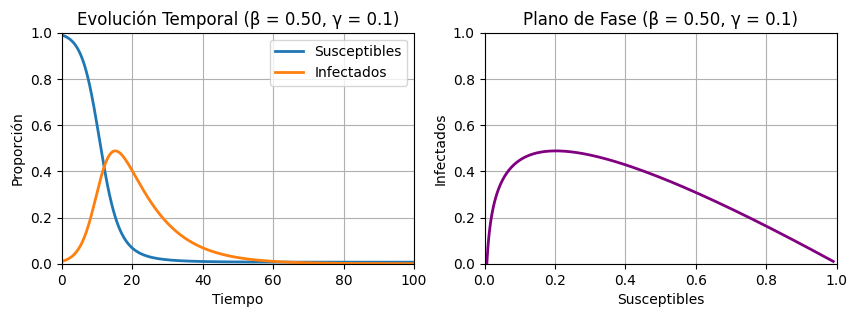

In [29]:
# Mostraremos una animación para observar el comportamiento de los susceptibles y infecciosos, variando beta
# Configuración inicial
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100

# Parámetros base
gamma_fijo = 0.1
beta_values = np.linspace(0.1, 0.5, 50)
h = 0.1
total_time = 100
initial_conditions = [0.99, 0.01]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

line_s, = ax1.plot([], [], lw=2, label='Susceptibles')
line_i, = ax1.plot([], [], lw=2, label='Infectados')
phase_line, = ax2.plot([], [], lw=2, color='purple')

def init():
    ax1.set_xlim(0, total_time)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Proporción')
    ax1.set_title('Evolución Temporal')
    ax1.legend()
    ax1.grid(True)

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('Susceptibles')
    ax2.set_ylabel('Infectados')
    ax2.set_title('Plano de Fase')
    ax2.grid(True)

    return line_s, line_i, phase_line,

# Función de animación
def animate(i):
    beta = beta_values[i]

    try:
        t, S, I = esquema(beta, gamma_fijo, initial_conditions[0], initial_conditions[1], h, total_time)

        # Actualizar graficas
        line_s.set_data(t, S)
        line_i.set_data(t, I)
        phase_line.set_data(S, I)

        # Actualizar títulos
        ax1.set_title(f'Evolución Temporal (β = {beta:.2f}, γ = {gamma_fijo})')
        ax2.set_title(f'Plano de Fase (β = {beta:.2f}, γ = {gamma_fijo})')
    except ValueError as e:
        print(f"Error en β = {beta:.2f}: {e}")

    return line_s, line_i, phase_line,

ani = FuncAnimation(fig, animate, init_func=init,
                    frames=len(beta_values), interval=100, blit=True)

HTML(ani.to_jshtml())

Según las simulaciones anteriores, a mayor tasa de propagación de la enfermedad, más rápido aumenta la cantidad de infectados y por lo tanto, disminuye la cantidad de susceptibles. Observamos también que para un tiempo suficientemente grande, los infecciosos tienden a 0, esto gracias al término $-\gamma I$ en la dinámica de los infecciosos.

En la siguiente gráfica, podemos observar la dependencia del pico de infectados \(o valor máximo de infecciones\) que puede alcanzar, dependiendo del $\beta$ y $\gamma$.


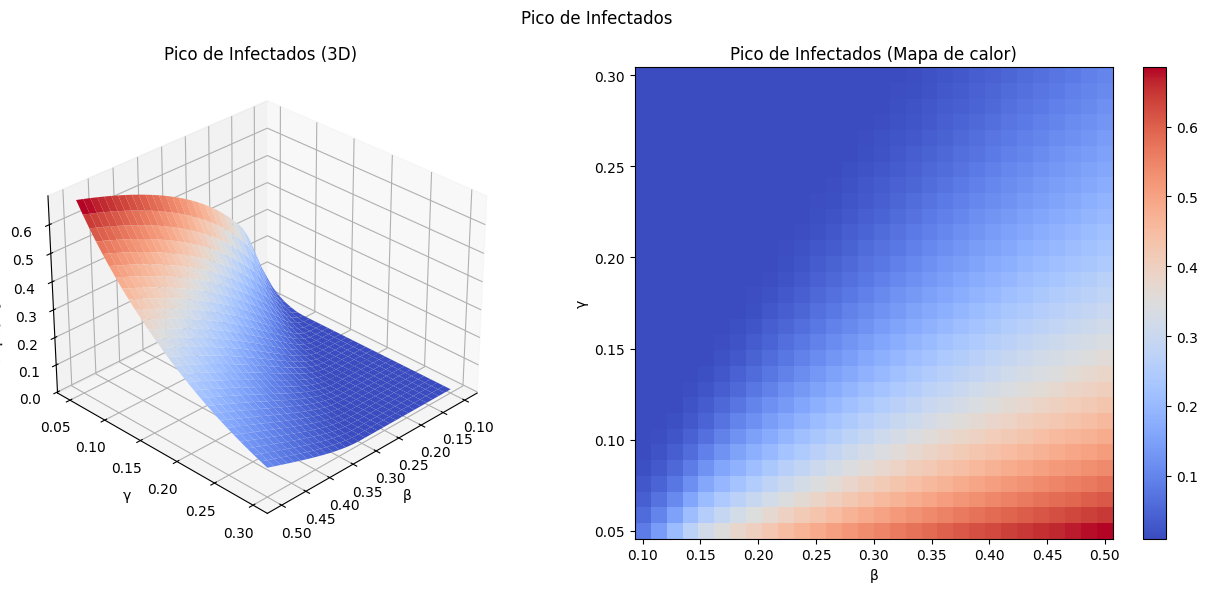

In [30]:
# Configuración de parámetros
beta_values = np.linspace(0.1, 0.5, 30)  # Rango de valores beta
gamma_values = np.linspace(0.05, 0.3, 30)  # Rango de valores gamma
S0 = 0.99  # Población susceptible inicial
I0 = 0.01  # Población infectada inicial
h = 0.1  # Paso temporal
total_time = 50  # Tiempo total de simulación

# Crear mallas para los parámetros
BETA, GAMMA = np.meshgrid(beta_values, gamma_values)

# Almacenar resultados
S_final = np.zeros_like(BETA)
I_max = np.zeros_like(BETA)

# Llenar las matrices de resultados
for i in range(len(beta_values)):
    for j in range(len(gamma_values)):
        try:
            t, S, I = esquema(BETA[i, j], GAMMA[i, j], S0, I0, h, total_time)
            I_max[i, j] = np.max(I)  # Pico máximo de infectados
        except ValueError as e:
            I_max[i, j] = np.nan
            print(f"Error en beta={BETA[i, j]:.2f}, gamma={GAMMA[i, j]:.2f}: {e}")

# Función para crear gráficos 3D y mapas de calor
def plot_3d_surface(X, Y, Z, title, zlabel, cmap='viridis'):
    fig = plt.figure(figsize=(13, 6))

    # Gráfico 3D
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')
    ax1.view_init(30, 45)
    ax1.set_xlabel('β')
    ax1.set_ylabel('γ')
    ax1.set_zlabel(zlabel)
    ax1.set_title(f'{title} (3D)')

    # Mapa de calor
    ax2 = fig.add_subplot(1, 2, 2)
    heatmap = ax2.pcolormesh(X, Y, Z, cmap=cmap, shading='auto')
    plt.colorbar(heatmap, ax=ax2)
    ax2.set_xlabel('β')
    ax2.set_ylabel('γ')
    ax2.set_title(f'{title} (Mapa de calor)')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Gráfico para Pico de Infectados
plot_3d_surface(BETA, GAMMA, I_max,
                'Pico de Infectados',
                'Pico de Infectados', cmap='coolwarm')

### **Análisis de estabilidad**

Para realizar un análisis de estabilidad, inicialmente determinaremos los puntos de equilibrio. Estos puntos de equilibrio son estados del sistema donde las variables no cambian con el tiempo. Es decir, no hay cambio en la población de susceptibles ni en la de infectados. Estos puntos de equilibrio satisfacen las ecuaciones

$$
\frac{dS}{dt} = 0 \hspace{0.5 cm} \frac{dI}{dt} = 0
$$

es decir,

$$
-\beta SI=0 \hspace{0.5 cm} \text{y} \hspace{0.5cm} \beta SI-\gamma I=0
$$

De la primera ecuación, tendríamos dos casos:

$$
S = 0 \hspace{0.5cm} \text{o} \hspace{0.5 cm} I = 0
$$

**Caso 1:** Si  $S=0$, entonces de la segunda ecuación se obtiene $I = 0$. Esto lo podemos interpretar como: Si no hay susceptibles ni infectados, entonces la infección ha terminado y no hay población susceptible para reiniciar la infección.

**Caso 2:** Si $I=0$, entonces se cumplen ambas ecuaciones independientemente del $S$ que se considere. Esto lo podemos interpretar como: Si hay una población susceptible pero no hay infectados, entonces la infección no está activa, pero se puede reiniciar si se introduce un nuevo individuo infectado en la población.

Ahora, analizaremos la estabilidad para cada uno de los puntos de equilibrio:

**Caso 1:** Consideremos $S=0$ y $I = 0$. Si introducimos una pequeña cantidad de infectados $I>0$, la ecuación $\frac{dI}{dt}=\beta SI - \gamma I$ se reduce a:

$$
\frac{dI}{dt}=-\gamma I
$$

lo cual implica que $I$ disminuirá exponencialmente a 0, por lo tanto, este primer punto de equilibrio es **estable.**

**Caso 2:** Ahora consideremos $I=0$ y $S=S^*$ una cantidad positiva cualquiera de susceptibles. Si introducimos una pequeña cantidad de infectados $I > 0$, la ecuación $\frac{dI}{dt}=\beta SI - \gamma I$ se reduce a

$$
\frac{dI}{dt} = (\beta S^* - \gamma) I
$$

Si $\beta S^* < \gamma$ entonces $\frac{dI}{dt} < 0$ y por tanto $I$ disminuye. Así, el punto sería **estable**.

Si $\beta S^* > \gamma$ entonces $\frac{dI}{dt} > 0$ y por tanto $I$ aumenta. Así, el punto sería **inestable**

Observemos esto mediante el gráfico de o¿k la siguiente simulación, considerando un valor fijo para $\beta = 0.3$ y $\gamma = 0.1$.



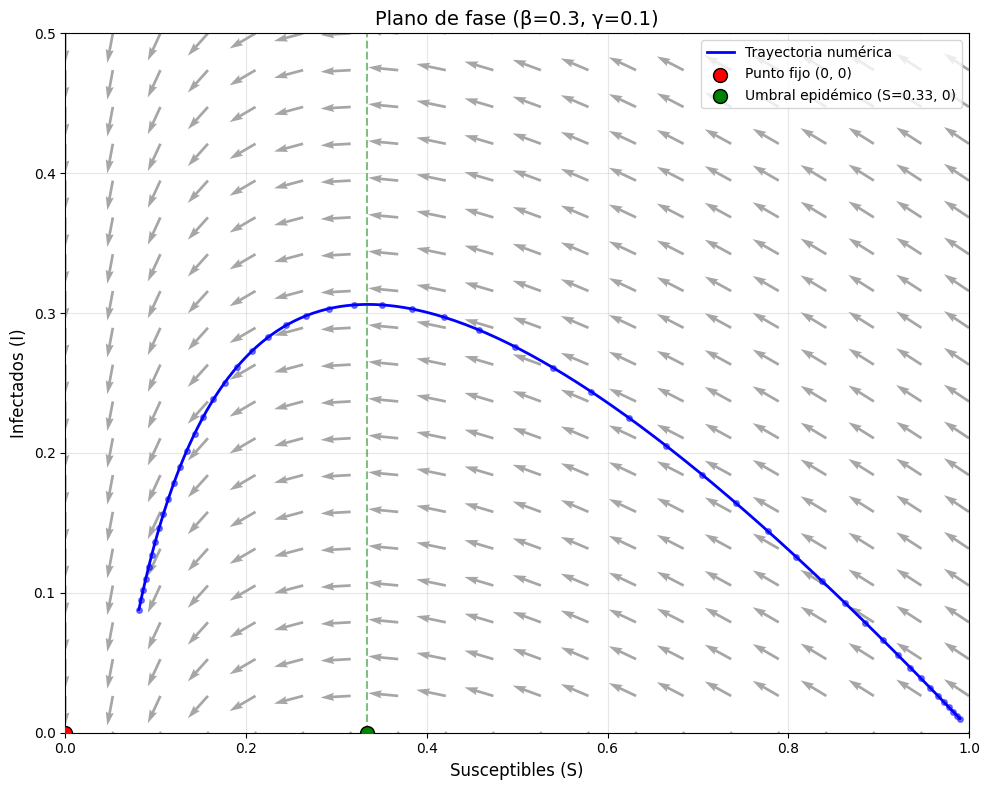

In [31]:
# Parámetros y simulación
beta = 0.3
gamma = 0.1
h = 0.1
total_time = 50
t, S, I = esquema(beta, gamma, 0.99, 0.01, h, total_time)

# Crear malla para el campo vectorial
S_grid, I_grid = np.meshgrid(np.linspace(0, 1, 20),
                            np.linspace(0, 0.5, 20))

# Calcular derivadas (campo vectorial)
dSdt = -beta * S_grid * I_grid
dIdt = beta * S_grid * I_grid - gamma * I_grid

# Normalizar vectores para mejor visualización
norm = np.sqrt(dSdt**2 + dIdt**2)
dSdt_norm = dSdt / (norm + 1e-6)  # Evitar división por cero
dIdt_norm = dIdt / (norm + 1e-6)

# Puntos fijos y umbral epidémico
S_umbral = gamma / beta
puntos_fijos = [(0, 0), (S_umbral, 0)]

plt.figure(figsize=(10, 8))

# Campo vectorial
plt.quiver(S_grid, I_grid, dSdt_norm, dIdt_norm,
          color='gray', alpha=0.7, scale=30, width=0.003)

# Trayectoria numérica
plt.plot(S, I, 'b-', lw=2, label='Trayectoria numérica')
plt.plot(S[::10], I[::10], 'bo', markersize=4, alpha=0.5)  # Puntos muestrales

# Puntos fijos
colors = ['red', 'green']
labels = ['Punto fijo (0, 0)', f'Umbral epidémico (S={S_umbral:.2f}, 0)']
for (S_f, I_f), color, label in zip(puntos_fijos, colors, labels):
    plt.scatter(S_f, I_f, s=100, color=color,
               edgecolors='black', zorder=5, label=label)

# Línea del umbral epidémico
plt.axvline(x=S_umbral, color='green', linestyle='--', alpha=0.5)

# Configuración de ejes
plt.xlabel('Susceptibles (S)', fontsize=12)
plt.ylabel('Infectados (I)', fontsize=12)
plt.title(f'Plano de fase (β={beta}, γ={gamma})', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

### **Caso real: Covid\-19 en Colombia 2020**

En esta sección, aplicaremos el modelo SI para un caso real: el covid\-19 en Colombia. Para esto, se consideró una base de datos que recopiló las muertes, los infectados y los recuperados por cada día entre el año 2020 y el año 2023. Ya que se considera un caso real, seguramente los parámetros serán variables y no constantes. Por lo tanto, se hará el estudio asumiendo un intervalo de tiempo pequeño.

Para estimar los parámetros $\beta$ y $\gamma$, se usó el método "_curve\_fit_" de Scipy. Estos parámetros se usarán en la discretización del modelo para poder ver la aproximación y posteriormente poder predecir los contagiados en días siguientes.

Como simulación, se tomarán los valores de la base de datos durante todo el año 2020. Como sigue a continuación:


β ajustado = 0.926119, γ ajustado = 0.847412


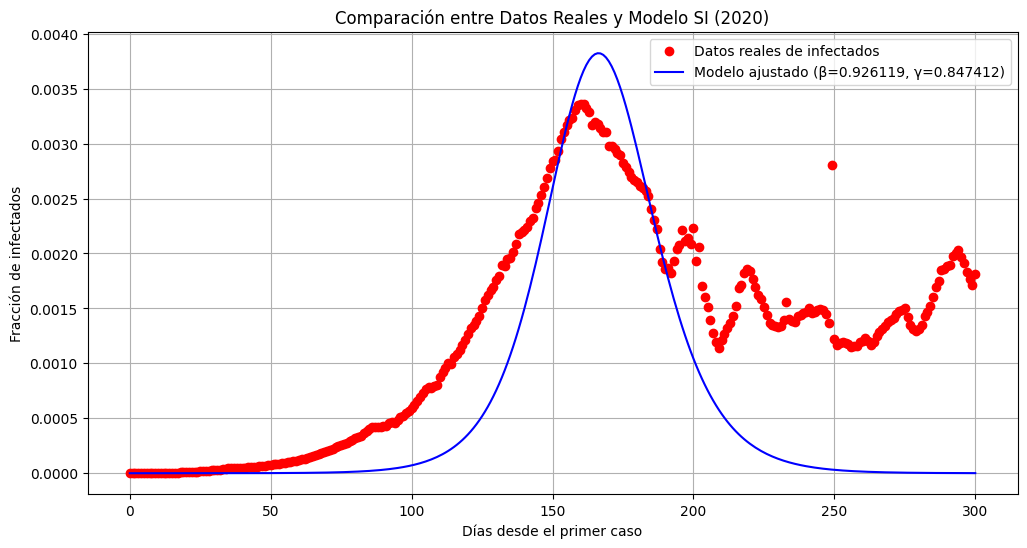

In [36]:
#with open('colombia2.json') as f:
#    data = json.load(f)
# Función para obtener datos desde GitHub
def get_github_json(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lanza error para códigos 400/500
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos: {e}")
        exit()

github_url = 'https://juan0711f.github.io/covid19/colombia2.json'

# Obtener y procesar datos
data = get_github_json(github_url)
colombia_data = data['Colombia']
colombia_data_sorted = sorted(colombia_data, key=lambda x: datetime.strptime(x['date'], '%Y-%m-%d')) # Ordenar datos por fecha

# Calcular casos activos
N = 50_372_424  # Población de Colombia (2020)
active = []
for entry in colombia_data_sorted:
    c = entry['confirmed']
    d = entry['deaths']
    r = entry['recovered']
    active.append(c - d - r)

start_idx = next(i for i, a in enumerate(active) if a > 0) # Encontrar el primer índice con casos activos > 0

active = active[start_idx:]
dates = [datetime.strptime(entry['date'], '%Y-%m-%d') for entry in colombia_data_sorted[start_idx:]]

I_data = np.array(active) / N # Normalizar los datos de infectados
t_data = np.arange(len(I_data)) # Puntos de tiempo (días desde el inicio)

# Condiciones iniciales
S0 = 1 - I_data[0]  # Susceptibles iniciales
I0 = I_data[0]      # Infectados iniciales

def model_function(t, beta, gamma):
    try:
        total_time = len(t) - 1  # Calcula el tiempo total de simulación basado en la longitud de t_data
        t_sim, S_sim, I_sim = esquema(beta, gamma, S0, I0, h=1, total_time=total_time)
        return I_sim
    except ValueError:
        # Retorna un array de infinitos si hay un error en la simulación
        return np.full_like(t, np.inf)

# Ajuste de parámetros
popt, pcov = curve_fit(model_function, t_data, I_data, p0=[0.926119, 0.847412], bounds=(0, [10, 10]))
beta_fit, gamma_fit = popt

print(f"β ajustado = {beta_fit:.6f}, γ ajustado = {gamma_fit:.6f}")

# Simular el modelo con los parámetros ajustados
total_time = len(t_data) - 1
t_sim, S_sim, I_sim = esquema(beta_fit, gamma_fit, S0, I0, h=1, total_time=total_time)

# Gráficar los datos reales y la simulación
plt.figure(figsize=(12, 6))
plt.plot(t_data, I_data, 'ro', label='Datos reales de infectados')
plt.plot(t_sim, I_sim, 'b-', label=f'Modelo ajustado (β={beta_fit:.6f}, γ={gamma_fit:.6f})')
plt.xlabel('Días desde el primer caso')
plt.ylabel('Fracción de infectados')
plt.legend()
plt.title('Comparación entre Datos Reales y Modelo SI (2020)')
plt.grid()
plt.show()

Observamos que la curva tiene un ajuste, pero no tan significativo, ya que se consideró un intervalo de tiempo relativamente grande.

Ahora, se tomará como intervalo de tiempo desde el día 2020\-3\-31 \(31 de marzo del 2020\) al día 2020\-10\-18 \(18 de octubre del 2020\). En este intervalo los datos muestran el pico que se tuvo durante el año 2020 \(año de inicio de la pandemia COVID 19\).



β ajustado = 0.593977, γ ajustado = 0.547941


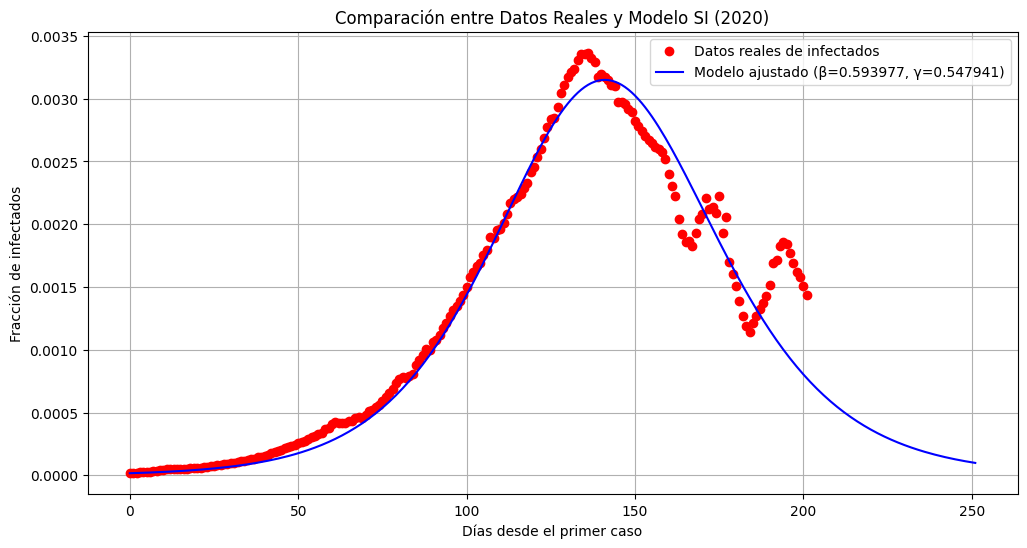

In [34]:
#with open('colombia4.json') as f:
#    data = json.load(f)
def get_github_json(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lanza error para códigos 400/500
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos: {e}")
        exit()
github_url = 'https://juan0711f.github.io/covid19/colombia4.json'

# Obtener y procesar datos
data = get_github_json(github_url)
colombia_data = data['Colombia']
colombia_data_sorted = sorted(colombia_data, key=lambda x: datetime.strptime(x['date'], '%Y-%m-%d')) # Ordenar datos por fecha

# Calcular casos activos
N = 50_372_424  # Población de Colombia (2020)
active = []
for entry in colombia_data_sorted:
    c = entry['confirmed']
    d = entry['deaths']
    r = entry['recovered']
    active.append(c - d - r)

start_idx = next(i for i, a in enumerate(active) if a > 0) # Encontrar el primer índice con casos activos > 0

active = active[start_idx:]
dates = [datetime.strptime(entry['date'], '%Y-%m-%d') for entry in colombia_data_sorted[start_idx:]]

I_data = np.array(active) / N # Normalizar los datos de infectados
t_data = np.arange(len(I_data)) # Puntos de tiempo (días desde el inicio)

# Condiciones iniciales
S0 = 1 - I_data[0]  # Susceptibles iniciales
I0 = I_data[0]      # Infectados iniciales

def model_function(t, beta, gamma):
    try:
        total_time = len(t) - 1  # Calcula el tiempo total de simulación basado en la longitud de t_data
        t_sim, S_sim, I_sim = esquema(beta, gamma, S0, I0, h=1, total_time=total_time)
        return I_sim
    except ValueError:
        # Retorna un array de infinitos si hay un error en la simulación
        return np.full_like(t, np.inf)

# Ajuste de parámetros
popt, pcov = curve_fit(model_function, t_data, I_data, p0=[0.926119, 0.847412], bounds=(0, [10, 10]))
beta_fit, gamma_fit = popt

print(f"β ajustado = {beta_fit:.6f}, γ ajustado = {gamma_fit:.6f}")

# Simular el modelo con los parámetros ajustados
total_time = len(t_data) - 1
t_sim, S_sim, I_sim = esquema(beta_fit, gamma_fit, S0, I0, h=1, total_time=total_time+50)

# Gráficar los datos reales y la simulación
plt.figure(figsize=(12, 6))
plt.plot(t_data, I_data, 'ro', label='Datos reales de infectados')
plt.plot(t_sim, I_sim, 'b-', label=f'Modelo ajustado (β={beta_fit:.6f}, γ={gamma_fit:.6f})')
plt.xlabel('Días desde el primer caso')
plt.ylabel('Fracción de infectados')
plt.legend()
plt.title('Comparación entre Datos Reales y Modelo SI (2020)')
plt.grid()
plt.show()

Observamos que la curva del modelo SI se ajusta más significativamente considerando el $\gamma$ y $\beta$ obtenido. El gráfico también muestra predicciones para 50 días posteriores al 18 de octubre del 2020.



### **Caso real: Ébola en Guinea 2015**

En esta sección, aplicaremos el modelo SI para un caso real: el ébola en Guinea. Para esto, se consideró una base de datos que recopiló las muertes, los infectados y los recuperados \(confirmados\) por varios días entre el año 2014 y el año 2016. Ya que se considera un caso real, seguramente los parámetros serán variables y no constantes. Por lo tanto, se hará el estudio asumiendo un intervalo de tiempo pequeño.

Para estimar los parámetros $\beta$ y $\gamma$, se usó el método "_curve\_fit_" de Scipy. Estos parámetros se usarán en la discretización del modelo para poder ver la aproximación y posteriormente poder predecir los contagiados en días siguientes.

Como simulación, se tomarán los valores de la base de datos durante todo el año 2015. Como sigue a continuación:



β ajustado = 0.494217, γ ajustado = 0.490789


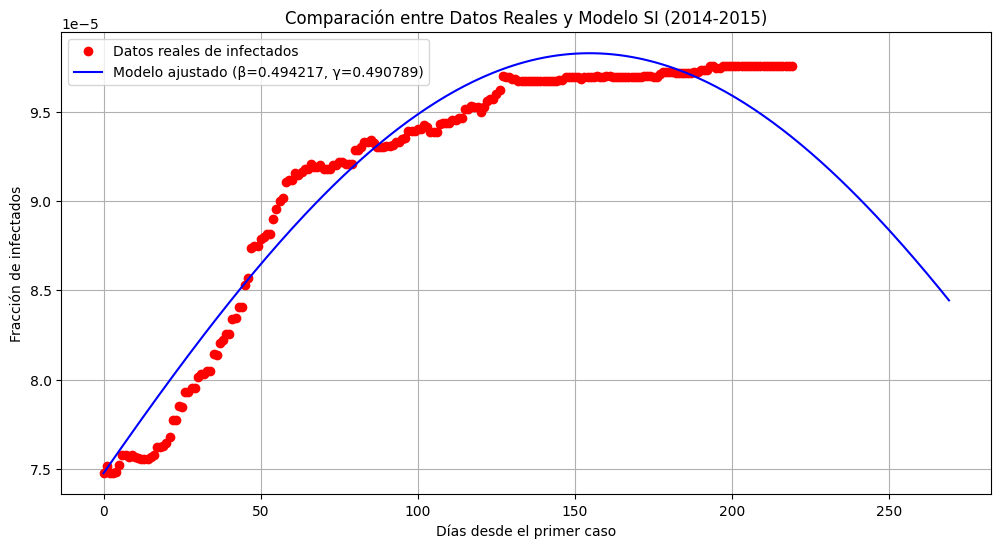

In [35]:
#with open('guinea3.json') as f:
#    data = json.load(f)
def get_github_json(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lanza error para códigos 400/500
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos: {e}")
        exit()

github_url = 'https://juan0711f.github.io/covid19/guinea3.json'

data = get_github_json(github_url)
guinea_data = data['Guinea']
guinea_data_sorted = sorted(guinea_data, key=lambda x: datetime.strptime(x['date'], '%Y-%m-%d')) # Ordenar datos por fecha

# Calcular casos activos
N = 13_000_000  # Población de Guinea (2020)
active = []
for entry in guinea_data_sorted:
    c = entry['confirmed']
    d = entry['deaths']
    r = entry['recovered']
    active.append(c - d - r)

start_idx = next(i for i, a in enumerate(active) if a > 0) # Encontrar el primer índice con casos activos > 0

active = active[start_idx:]
dates = [datetime.strptime(entry['date'], '%Y-%m-%d') for entry in guinea_data_sorted[start_idx:]]

I_data = np.array(active) / N # Normalizar los datos de infectados
t_data = np.arange(len(I_data)) # Puntos de tiempo (días desde el inicio)

# Condiciones iniciales
S0 = 1 - I_data[0]  # Susceptibles iniciales
I0 = I_data[0]      # Infectados iniciales

def model_function(t, beta, gamma):
    try:
        total_time = len(t) - 1  # Calcula el tiempo total de simulación basado en la longitud de t_data
        t_sim, S_sim, I_sim = esquema(beta, gamma, S0, I0, h=1, total_time=total_time)
        return I_sim
    except ValueError:
        # Retorna un array de infinitos si hay un error en la simulación
        return np.full_like(t, np.inf)

# Ajuste de parámetros
popt, pcov = curve_fit(model_function, t_data, I_data, p0=[0.926119, 0.847412], bounds=(0, [10, 10]))
beta_fit, gamma_fit = popt

print(f"β ajustado = {beta_fit:.6f}, γ ajustado = {gamma_fit:.6f}")

# Simular el modelo con los parámetros ajustados
total_time = len(t_data) - 1
t_sim, S_sim, I_sim = esquema(beta_fit, gamma_fit, S0, I0, h=1, total_time=total_time+50)

# Gráficar los datos reales y la simulación
plt.figure(figsize=(12, 6))
plt.plot(t_data, I_data, 'ro', label='Datos reales de infectados')
plt.plot(t_sim, I_sim, 'b-', label=f'Modelo ajustado (β={beta_fit:.6f}, γ={gamma_fit:.6f})')
plt.xlabel('Días desde el primer caso')
plt.ylabel('Fracción de infectados')
plt.legend()
plt.title('Comparación entre Datos Reales y Modelo SI (2014-2015)')
plt.grid()
plt.show()

Se observa un buen ajuste del modelo, aunque la base de datos usada no considera dias equidistantes. Si esto mejorara, se esperaría que la curva fuera mejor aproximada y las predicciones futuras fueran mejor.

